In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
!git clone https://github.com/SkaMessi10/Hackoff_Data_BitsPlease.git

fatal: destination path 'Hackoff_Data_BitsPlease' already exists and is not an empty directory.


In [0]:
capital = pd.read_csv('/content/Hackoff_Data_BitsPlease/Capital_Expenditure1.csv')
military = pd.read_csv('/content/Hackoff_Data_BitsPlease/Military Expenditure1.csv')
social_sector = pd.read_csv('/content/Hackoff_Data_BitsPlease/Social_Sector_Expenditure1.csv')

In [333]:
capital.head()

,State,Total expenditure
0,1980-81,7856.0
1,1981-82,8095.0
2,1982-83,8505.0
3,1983-84,9738.0
4,1984-85,11509.0


In [334]:
capital.tail()

,State,Total expenditure
31,2011-12,286012.74
32,2012-13,312257.22
33,2013-14,337572.64
34,2014-15 (RE),447963.14
35,2015-16 (BE),498340.39


In [335]:
military.head()


,Year,Expenditure
0,1960,6.817657e+08
1,1961,8.120000e+08
2,1962,1.065436e+09
3,1963,1.795449e+09
4,1964,1.986654e+09


In [336]:
military.tail()

,Year,Expenditure
54,2014,5.091411e+10
55,2015,5.129548e+10
56,2016,5.663762e+10
57,2017,6.455944e+10
58,2018,6.651029e+10


In [337]:
social_sector.head()

,Year,Total expenditure(in crore rupees)
0,1980-81,6754
1,1981-82,7659
2,1982-83,9353
3,1983-84,10786
4,1984-85,12419


In [338]:
social_sector.tail()

,Year,Total expenditure(in crore rupees)
31,2011-12,538520
32,2012-13,618940
33,2013-14,696510
34,2014-15,1002230
35,2015-16 (RE),1074780


In [339]:
print(social_sector.count())

Year                                  36
Total expenditure(in crore rupees)    36
dtype: int64


In [340]:
print(military.count())
print(capital.count())

Year           59
Expenditure    59
dtype: int64
State                36
Total expenditure    36
dtype: int64


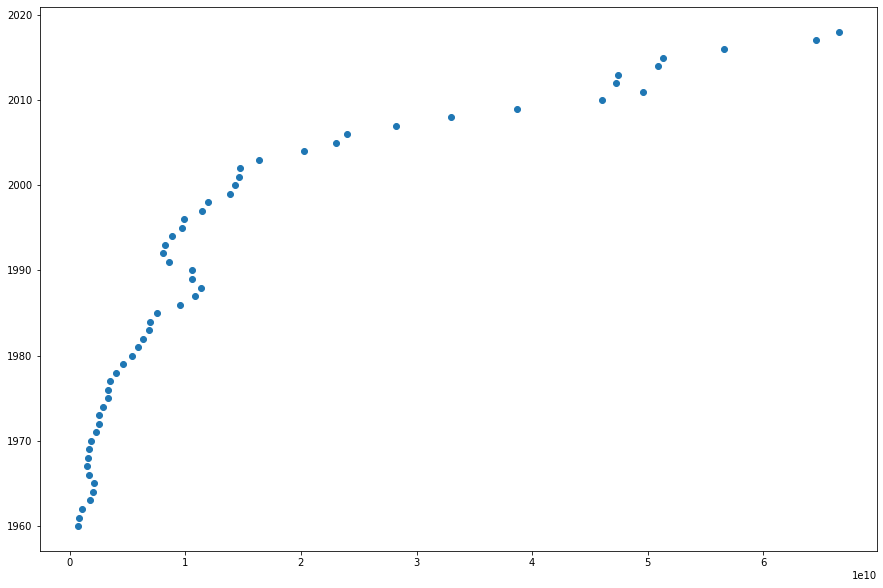

In [341]:
plt.figure(figsize=(15,10))
plt.scatter(military.iloc[:,1],military.iloc[:,0])
plt.show()

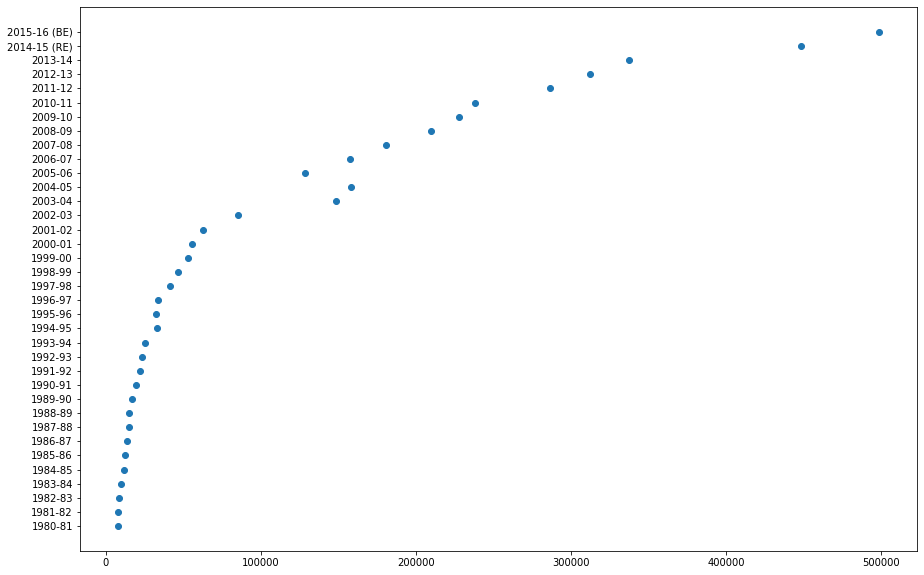

In [342]:
plt.figure(figsize=(15,10))
plt.scatter(capital.iloc[:,1],capital.iloc[:,0])
plt.show()

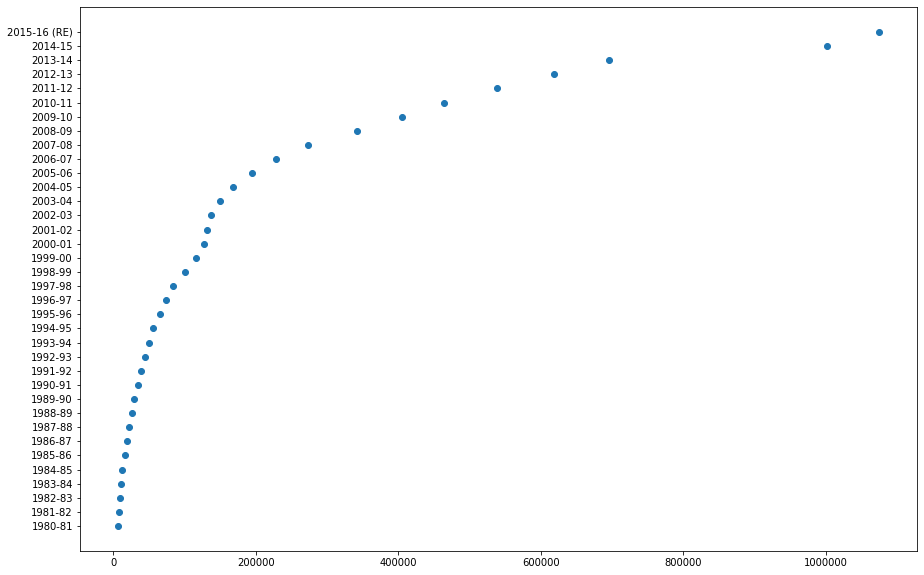

In [343]:
plt.figure(figsize=(15,10))
plt.scatter(social_sector.iloc[:,1],social_sector.iloc[:,0])
plt.show()

In [0]:
year = [x for x in range(1980,1980+36)]

In [345]:
print(year)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [346]:
capital.iloc[:,0]=year
social_sector.iloc[:,0]=year
print(social_sector.head())
print(capital.head())

   Year  Total expenditure(in crore rupees)
0  1980                                6754
1  1981                                7659
2  1982                                9353
3  1983                               10786
4  1984                               12419
   State  Total expenditure
0   1980             7856.0
1   1981             8095.0
2   1982             8505.0
3   1983             9738.0
4   1984            11509.0


In [347]:
military.shape

(59, 2)

In [348]:
military.head()

,Year,Expenditure
0,1960,6.817657e+08
1,1961,8.120000e+08
2,1962,1.065436e+09
3,1963,1.795449e+09
4,1964,1.986654e+09


In [0]:
military = military.set_index('Year')

In [350]:
military.head()

,Expenditure
Year,
1960,6.817657e+08
1961,8.120000e+08
1962,1.065436e+09
1963,1.795449e+09
1964,1.986654e+09


In [0]:
from sklearn.preprocessing import MinMaxScaler
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(military)

In [0]:
#print(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [388]:
import keras
from keras.layers import LSTM,Dense
from keras.models import Sequential
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(17, input_shape=(look_back, 1)))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=60, batch_size=1, verbose=2)

Epoch 1/60
 - 5s - loss: 0.0040
Epoch 2/60
 - 0s - loss: 0.0023
Epoch 3/60
 - 0s - loss: 0.0021
Epoch 4/60
 - 0s - loss: 0.0018
Epoch 5/60
 - 0s - loss: 0.0016
Epoch 6/60
 - 0s - loss: 0.0013
Epoch 7/60
 - 0s - loss: 0.0012
Epoch 8/60
 - 0s - loss: 9.5699e-04
Epoch 9/60
 - 0s - loss: 6.8914e-04
Epoch 10/60
 - 0s - loss: 5.1814e-04
Epoch 11/60
 - 0s - loss: 3.5355e-04
Epoch 12/60
 - 0s - loss: 2.3307e-04
Epoch 13/60
 - 0s - loss: 1.8263e-04
Epoch 14/60
 - 0s - loss: 1.4723e-04
Epoch 15/60
 - 0s - loss: 1.2806e-04
Epoch 16/60
 - 0s - loss: 1.1378e-04
Epoch 17/60
 - 0s - loss: 1.3971e-04
Epoch 18/60
 - 0s - loss: 1.1596e-04
Epoch 19/60
 - 0s - loss: 1.0296e-04
Epoch 20/60
 - 0s - loss: 1.1440e-04
Epoch 21/60
 - 0s - loss: 1.0992e-04
Epoch 22/60
 - 0s - loss: 1.0554e-04
Epoch 23/60
 - 0s - loss: 1.2902e-04
Epoch 24/60
 - 0s - loss: 1.1831e-04
Epoch 25/60
 - 0s - loss: 1.3233e-04
Epoch 26/60
 - 0s - loss: 1.1368e-04
Epoch 27/60
 - 0s - loss: 1.1262e-04
Epoch 28/60
 - 0s - loss: 1.2056e-04
E

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [391]:
print(testPredict,testY)

[[1.4145521e+10]
 [1.4547476e+10]
 [1.4868867e+10]
 [1.5021906e+10]
 [1.6652118e+10]
 [2.0692881e+10]
 [2.3643374e+10]
 [2.4561875e+10]
 [2.9070055e+10]
 [3.4066330e+10]
 [4.0102199e+10]
 [4.7877493e+10]
 [5.1606954e+10]
 [4.9064133e+10]
 [4.9260630e+10]
 [5.2951884e+10]
 [5.3352202e+10]
 [5.8941846e+10]] [[1.42875142e+10 1.46006423e+10 1.47496673e+10 1.63339866e+10
  2.02385665e+10 2.30723129e+10 2.39519280e+10 2.82547734e+10
  3.30023767e+10 3.87221544e+10 4.60904457e+10 4.96338158e+10
  4.72169200e+10 4.74035288e+10 5.09141083e+10 5.12954838e+10
  5.66376226e+10 6.45594353e+10]]


In [392]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 652686388.83 RMSE
Test Score: 3161911718.10 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

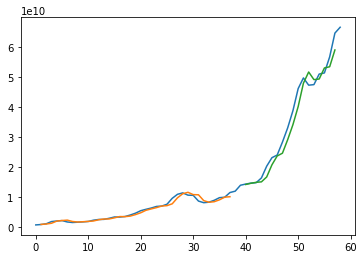

In [394]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [363]:
print(testPredict[-1])

[5.8549092e+10]


In [364]:
print(testY[-1])

[1.42875142e+10 1.46006423e+10 1.47496673e+10 1.63339866e+10
 2.02385665e+10 2.30723129e+10 2.39519280e+10 2.82547734e+10
 3.30023767e+10 3.87221544e+10 4.60904457e+10 4.96338158e+10
 4.72169200e+10 4.74035288e+10 5.09141083e+10 5.12954838e+10
 5.66376226e+10 6.45594353e+10]


In [365]:
print(testPredict)

[[1.4964864e+10]
 [1.5361092e+10]
 [1.5677831e+10]
 [1.5828631e+10]
 [1.7434094e+10]
 [2.1406411e+10]
 [2.4300659e+10]
 [2.5200587e+10]
 [2.9610416e+10]
 [3.4484011e+10]
 [4.0353087e+10]
 [4.7884673e+10]
 [5.1486122e+10]
 [4.9031348e+10]
 [4.9221153e+10]
 [5.2783174e+10]
 [5.3169070e+10]
 [5.8549092e+10]]


In [366]:
print(testY)

[[1.42875142e+10 1.46006423e+10 1.47496673e+10 1.63339866e+10
  2.02385665e+10 2.30723129e+10 2.39519280e+10 2.82547734e+10
  3.30023767e+10 3.87221544e+10 4.60904457e+10 4.96338158e+10
  4.72169200e+10 4.74035288e+10 5.09141083e+10 5.12954838e+10
  5.66376226e+10 6.45594353e+10]]


In [367]:
print(np.size(testPredict,0),np.size(testY,1))

18 18


In [368]:
print(trainPredict)

[[1.8040346e+09]
 [1.9315073e+09]
 [2.1797179e+09]
 [2.8957550e+09]
 [3.0835610e+09]
 [3.2204861e+09]
 [2.7639127e+09]
 [2.5937364e+09]
 [2.6910036e+09]
 [2.7936335e+09]
 [2.9325967e+09]
 [3.3475689e+09]
 [3.5855964e+09]
 [3.6177513e+09]
 [3.9776187e+09]
 [4.3997404e+09]
 [4.3713976e+09]
 [4.5511107e+09]
 [5.0435927e+09]
 [5.6507459e+09]
 [6.4742636e+09]
 [6.9290691e+09]
 [7.3495158e+09]
 [7.8754918e+09]
 [8.0008678e+09]
 [8.6091530e+09]
 [1.0580833e+10]
 [1.1923355e+10]
 [1.2394826e+10]
 [1.1634461e+10]
 [1.1581483e+10]
 [9.6631409e+09]
 [9.1243182e+09]
 [9.2944230e+09]
 [9.9212524e+09]
 [1.0796397e+10]
 [1.0946984e+10]]


In [369]:
print(trainY)

[[8.12000000e+08 1.06543606e+09 1.79544929e+09 1.98665449e+09
  2.12598963e+09 1.66115491e+09 1.48773333e+09 1.58686667e+09
  1.69143333e+09 1.83296667e+09 2.25525698e+09 2.49724471e+09
  2.52992105e+09 2.89541572e+09 3.32364680e+09 3.29491061e+09
  3.47708094e+09 3.97581913e+09 4.58973835e+09 5.42080952e+09
  5.87900704e+09 6.30210796e+09 6.83076870e+09 6.95668245e+09
  7.56702402e+09 9.53936309e+09 1.08774062e+10 1.13464192e+10
  1.05897969e+10 1.05370354e+10 8.62247388e+09 8.08323141e+09
  8.25354258e+09 8.88055123e+09 9.75446463e+09 9.90467274e+09
  1.14648834e+10]]


In [370]:
print(testY)

[[1.42875142e+10 1.46006423e+10 1.47496673e+10 1.63339866e+10
  2.02385665e+10 2.30723129e+10 2.39519280e+10 2.82547734e+10
  3.30023767e+10 3.87221544e+10 4.60904457e+10 4.96338158e+10
  4.72169200e+10 4.74035288e+10 5.09141083e+10 5.12954838e+10
  5.66376226e+10 6.45594353e+10]]
